In this project, we will use **Vision Transformer (ViT)** for the `Image Classification` task, **ViT** was introduced in [June 2021](https://arxiv.org/abs/2010.11929) by a team of researchers at Google Brain. 

This paper explored how you can `tokenize` images, just as you would tokenize sentences, so that they can be passed to transformer models for training.

1. Split an image into a grid of sub-image patches
2. Embed each patch with a linear projection
3. Each embedded patch becomes a token, and the resulting sequence of embedded patches is the sequence you pass to the model.

In this example post, we'll walk through how to leverage 🤗 datasets to download and process image classification datasets, and then use them to fine-tune a pre-trained ViT with 🤗 transformers.

We will also deploy the demo model on **Hugging Face Spaces** with **Gradio**.

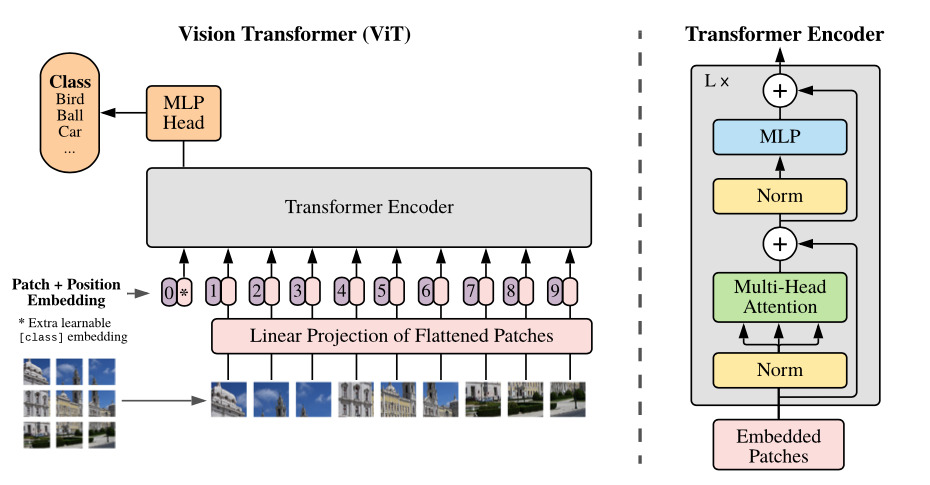

# Import modules

In [13]:
import os, glob
import torch
import math
import pytorch_lightning as pl
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from torchmetrics import Accuracy
from torchvision.datasets import ImageFolder
from transformers import ViTFeatureExtractor, ViTForImageClassification
from huggingface_hub import HfApi, HfFolder, Repository, notebook_login

# Load and split data

In [28]:
data_dir = './data'

ds = ImageFolder(data_dir)
indices = torch.randperm(len(ds)).tolist()
n_val = math.floor(len(indices) * .10)
n_test = math.floor(len(indices) * .10)
train_ds = torch.utils.data.Subset(ds, indices[:-(n_val+n_test)])
val_ds = torch.utils.data.Subset(ds, indices[-(n_val+n_test):-n_test])
test_ds = torch.utils.data.Subset(ds, indices[-n_test:])
print("Train items:", len(train_ds), "Validation items:", len(val_ds), "Test items:", len(test_ds))

Train items: 20945 Validation items: 2617 Test items: 2617
